# Немного о том, что тут происходит

Это мой ноутбук, посвященный реализации **алгоритма линейной регрессии**, использующего в качестве основы (для поиска минимума функции потерь) метод **стохастического градиентного спуска**. Линейная регрессия реализована в виде класса. Для того, чтобы тренировать модель исходя из входных данных, необходимо сначала создать объект класса **Linear_regression**, передав необходимые для обучения модели параметры, после чего тренировать модель, используя метод **fit()** класса Linear_regression. Далее, уже с помощью функции **predict()**, можно предсказать значение таргета при даных значениях выборки.

# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Класс "Линейная регрессия"

In [2]:
class Linear_regression():
    def __init__(self, learning_rate, iterations_quant, reg_coefficient = 0):
        self.learning_rate = learning_rate
        self.iterations_quant = iterations_quant
        self.reg_coefficient = reg_coefficient
    
    def fit(self, X, Y):
        self.df_rows_quant, self.df_columns_quant = X.shape

        self.w = np.zeros(self.df_columns_quant)
        self.bias = 0

        self.X = X
        self.Y = Y

        for i in range(self.iterations_quant):
            some_predict = self.predict(self.X)
            
            transposed_X = np.transpose(self.X)
            err = some_predict - self.Y

            d_w = 2 * np.dot(transposed_X, err) / self.df_rows_quant
            d_bias = 2 * np.sum(some_predict - self.Y) / self.df_rows_quant

            self.w -= self.learning_rate * (d_w + 2 * self.reg_coefficient * d_w)
            self.bias -= self.learning_rate * (d_bias + 2 * self.reg_coefficient + d_bias)

    def predict(self, X):
        return np.dot(X, self.w) + self.bias

# Инициализируем входные данные

## Для начала, импортируем датасет

In [3]:
df = pd.read_csv("sample_data/some_function_values.csv")
df

,x,x**2,x**3,x**4,x**5,x**6,x**7,y
0,1.498987,2.246961,3.368164,5.048833,7.568133,11.344530,17.005298,1.270076
1,0.780079,0.608524,0.474697,0.370301,0.288864,0.225337,0.175781,1.326823
2,0.533861,0.285008,0.152155,0.081230,0.043365,0.023151,0.012359,1.284534
3,1.543530,2.382485,3.677436,5.676233,8.761435,13.523538,20.873985,1.385828
4,0.698120,0.487371,0.340244,0.237531,0.165825,0.115766,0.080818,1.353414
...,...,...,...,...,...,...,...,...
395,0.649850,0.422305,0.274435,0.178341,0.115895,0.075314,0.048943,1.351431
396,-0.932842,0.870195,-0.811755,0.757239,-0.706385,0.658946,-0.614693,0.533820
397,0.908603,0.825559,0.750105,0.681548,0.619256,0.562658,0.511232,1.229467
398,1.570778,2.467343,3.875648,6.087782,9.562554,15.020649,23.594103,1.467343


## Теперь разделим его на список объектов и список соответствующих им таргетов

In [4]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

## Сделаем разделение списка объектов и таргетов на тренировочные и тестовые

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 42)

# Создаем модель линейной регрессии и тренируем ее на нашем датасете

In [6]:
model = Linear_regression(0.0002, 300000, 0.2)
model.fit(X_train, Y_train)

# Используя тестовую выборку, сделаем нужные предсказания

In [7]:
Y_test_pred = model.predict(X_test)

# Выведем данные, которые нам удалось найти (Вектор w и сдвиг bias)

In [8]:
w_list = list(model.w)

print("bias after training:", model.bias, "\n")

for i, w_i in enumerate(w_list):
    print("w_{} =".format(i + 1), w_list[i])

bias after training: -0.22234497425806174 

w_1 = 2.256323274596086
w_2 = 1.1376383508708692
w_3 = -1.7554542892965508
w_4 = -0.5169641860597939
w_5 = -0.27295131332599354
w_6 = 0.9326640510035848
w_7 = -0.2622716740176645


# Теперь выведем график, на котором будут отражены объекты тестовой выборки и предсказания модели

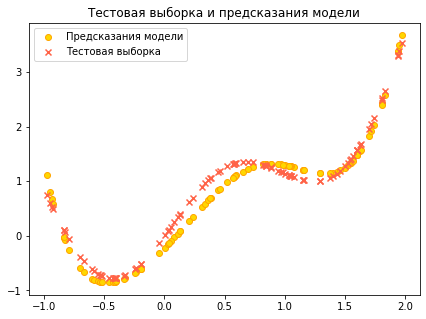

In [9]:
graph_X_values = X_test[:, 0]
graph_Y_test_values = Y_test
grapg_Y_pred_values = Y_test_pred

figure, ax = plt.subplots()

figure.set_figwidth(7)
figure.set_figheight(5)

ax.set_title('Тестовая выборка и предсказания модели')
ax.scatter(graph_X_values, grapg_Y_pred_values, color = "gold",
           edgecolors='orange', label = "Предсказания модели")
ax.scatter(graph_X_values, graph_Y_test_values, color = "tomato",
           label = "Тестовая выборка", marker = "x")

ax.legend()

plt.show()

# В дополнение к графику можно вывести две таблицы

## Таблица с истиными значениями таргетов для соответствующих объектов

In [10]:
test_df = pd.DataFrame(np.concatenate((X_test, Y_test[:, np.newaxis]), axis = 1),
             columns = ["x", "x**2", "x**3", "x**4", "x**5", "x**6", "x**7", "y"])

test_df

,x,x**2,x**3,x**4,x**5,x**6,x**7,y
0,0.967968,0.936963,0.906950,0.877899,0.849779,8.225592e-01,7.962113e-01,1.172419
1,0.847190,0.717731,0.608055,0.515138,0.436420,3.697307e-01,3.132323e-01,1.282392
2,-0.193933,0.037610,-0.007294,0.001415,-0.000274,5.319940e-05,-1.031711e-05,-0.511917
3,0.082605,0.006824,0.000564,0.000047,0.000004,3.177187e-07,2.624520e-08,0.252110
4,1.152166,1.327487,1.529486,1.762223,2.030374,2.339328e+00,2.695295e+00,1.017760
...,...,...,...,...,...,...,...,...
95,-0.924188,0.854124,-0.789372,0.729528,-0.674221,6.231075e-01,-5.758686e-01,0.493415
96,1.038191,1.077840,1.119003,1.161739,1.206107,1.252169e+00,1.299990e+00,1.104857
97,1.565850,2.451886,3.839287,6.011747,9.413495,1.474012e+01,2.308082e+01,1.451997
98,1.951512,3.808399,7.432137,14.503905,28.304545,5.523666e+01,1.077950e+02,3.392757


## Таблица с предсказанными значениями таргетов для соответствующих объектов

In [11]:
pred_df = pd.DataFrame(np.concatenate((X_test, Y_test_pred[:, np.newaxis]), axis = 1),
             columns = ["x", "x**2", "x**3", "x**4", "x**5", "x**6", "x**7", "y"])

pred_df

,x,x**2,x**3,x**4,x**5,x**6,x**7,y
0,0.967968,0.936963,0.906950,0.877899,0.849779,8.225592e-01,7.962113e-01,1.308076
1,0.847190,0.717731,0.608055,0.515138,0.436420,3.697307e-01,3.132323e-01,1.315549
2,-0.193933,0.037610,-0.007294,0.001415,-0.000274,5.319940e-05,-1.031711e-05,-0.604934
3,0.082605,0.006824,0.000564,0.000047,0.000004,3.177187e-07,2.624520e-08,-0.029213
4,1.152166,1.327487,1.529486,1.762223,2.030374,2.339328e+00,2.695295e+00,1.212281
...,...,...,...,...,...,...,...,...
95,-0.924188,0.854124,-0.789372,0.729528,-0.674221,6.231075e-01,-5.758686e-01,0.588851
96,1.038191,1.077840,1.119003,1.161739,1.206107,1.252169e+00,1.299990e+00,1.279098
97,1.565850,2.451886,3.839287,6.011747,9.413495,1.474012e+01,2.308082e+01,1.377239
98,1.951512,3.808399,7.432137,14.503905,28.304545,5.523666e+01,1.077950e+02,3.488610
